In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from itertools import combinations,chain

In der Klasse sind 25 Personen.


,namen,verbindungen
0,Irmak,18
1,Luiz,18
2,Mark,17
3,Levin,17
4,Estelle,16
5,Layan,14
6,Emma,13
7,Zeno,13
8,Joshua,13
9,Katerina,12


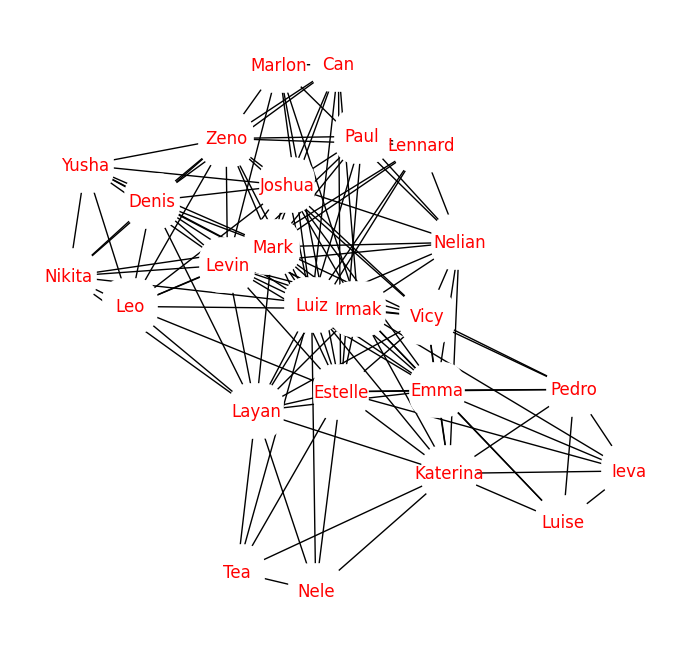

In [27]:
names = pd.read_csv('namen.csv')

pairs = list()
personen = list()
for i in names.index:
    n = [k for k in names.loc[i,:].values if pd.notnull(k)]
    personen += n
    pairs += [tuple(set([n[0],k])) for k in n[1:]]
pairs = {x:pairs.count(x) for x in pairs}
personen = list(set(personen))
print("In der Klasse sind {:} Personen.".format(len(personen)))

G = nx.Graph()
G.add_nodes_from(personen)
for k,v in pairs.items():
    try: G.add_edge(k[0], k[1], weight=v)
    except: pass
pos = nx.spring_layout(G)

fig, ax = plt.subplots(1,1,figsize=(11.69,8.27))
nx.draw_networkx(G, pos, with_labels=True,ax=ax, font_color='red',node_size=100, node_color="white", node_shape="s", alpha=1, linewidths=30)
ax.set_aspect('equal')
plt.box(False)
fig.savefig("soziogramm.pdf")

cons = { k:len(G.edges(k)) for k in personen }
pd.DataFrame({'namen':cons.keys(), 'verbindungen':cons.values()}).sort_values('verbindungen',ascending=False).reset_index(drop=True)

,namen,verbindungen
0,Can,5
1,Inga,3
2,Lena,2
3,Peter,2
4,Maria,2
5,Sören,1
6,Memeth,1
